For the function
$f(x_1, x_2) = x_1^2+x_2^2 + 9$

The minimiser and minimum are

$(x_1, x_2) = (0,0)$ and
$min f(x_1,x_2) = 9$

This function is **convex** as the determinant of its hessian matrix is positive (also we can use the logic that it resembles a quadratic function with positive coefficients and independent variables whose gradients do not depend on one another)

Now,

For the function $g(X)$

The minimiser is a matrix $X_0$ with each entry equal to $i^2$, where $i$ denotes the index of the matrix $X_0$ starting from index $1$

$X_0^T = [i^2]$ for all $i$ belonging to the set $[1,n]$

Clearly $X_0$ is an $n$ x $1$ matrix

The minimised value of $g(X)$ is equal to $0$

The function $g(X)$ is **convex**

This is because it resembles a quadratic function with positive coefficients and independent variables whose gradients do not depend on one another (also implying that the determinant of the hessian is positive)


By gradient descent with exact line search
9.0
Minimiser in x =  0.0
Minimiser in y =  0.0
Total iterations =  1
Time taken =  0.001961946487426758

By Newton Method
9.0
Minimiser in x =  0.0
Minimiser in y =  0.0
Total iterations =  1
Time taken =  0.004885435104370117


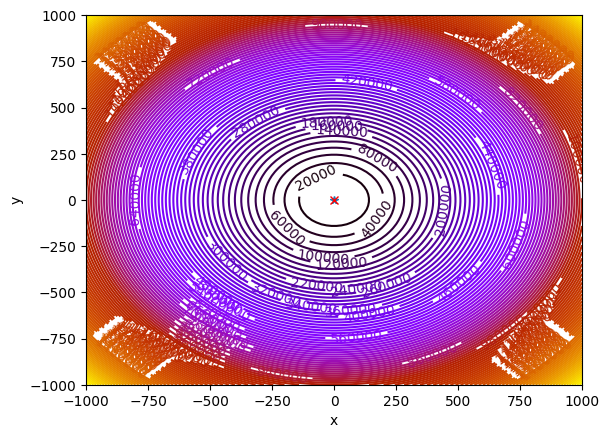

In [1]:
#Exercise 3 part 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

# Define the function to be minimized
def f(x, y):
    return x**2 + y**2 + 9


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 2*x

def df_dy(x, y):
    return 2*y

def hess():
    h = np.zeros((2,2))
    h[0][0] = 2
    h[1][1] = 2
    return h

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent with line search algorithm
def gradient_descent_with_ls(start_x, start_y, p):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(p)
        count = 0

        #now regarding our function
        #it seems that the value of our step length
        #will be constant regardless of the value of x1 and x2
        #the calculated value for step length is = 0.5

        step_length_line_search = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):

            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - step_length_line_search * grad_x
            y = y - step_length_line_search * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            # Plotting the points on the plot
            plt.plot(x, y, "*", ms=5.5)

        return x, y, f(x, y), history, count



# Define the newton method
def newton(start_x, start_y, p):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(p)
        count = 0

        # Perform the gradient descent iterations

        while (norm > TLevel):

            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            #taking the inverse of hessian
            h = hess()
            h_inv = np.linalg.inv(h)

            # Update the parameters
            x = x - (h_inv[0][0]*grad_x + h_inv[0][1]*grad_y)
            y = y - (h_inv[1][0]*grad_x + h_inv[1][1]*grad_y)

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            # Plotting the points on the plot
            plt.plot(x, y, "rx-", ms=5.5)

        return x, y, f(x, y), history, count


# Plotting the level sets using a contour map
x = np.linspace(-1000, 1000, 100)
y = np.linspace(-1000, 1000, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')


# Perform algorithms
start_x, start_y = 1000, -1000

#defining a tolerance for plotting
toler = 0.0000000000000001

start_ls = time.time()
x_opt_ls, y_opt_ls, f_opt_ls, history_ls, count_ls = gradient_descent_with_ls(start_x, start_y, toler)
stop_ls = time.time()

#taking time for execution for line search
duration_ls = stop_ls - start_ls

#now for newton method

start_gd = time.time()
x_opt_gd, y_opt_gd, f_opt_gd, history_gd, count_gd = newton(start_x, start_y, toler)
stop_gd = time.time()

#taking time for execution of newton method
duration_gd = stop_gd - start_gd

print()
print("By gradient descent with exact line search")
print(f_opt_ls)
print("Minimiser in x = ", x_opt_ls)
print("Minimiser in y = ", y_opt_ls)
print("Total iterations = ", count_ls)
print("Time taken = ", duration_ls)

print()
print("By Newton Method")
print(f_opt_gd)
print("Minimiser in x = ", x_opt_gd)
print("Minimiser in y = ", y_opt_gd)
print("Total iterations = ", count_gd)
print("Time taken = ", duration_gd)





Using exact line search we converge in one iteration, as our step length will always be constant and equal to 0.5

Newton's method being almost equally fast, we also obtain our minimised value in very small number of iterations.

Both methods provide the solution with high precison

In [2]:
#Exercise 3 part 3 - using exact line search with many values of n

import numpy as np
import math as m
import time #this is to take time

#this function is used to initialise x as a n x 1 vector

def x_init(n):

    x0 = np.zeros((n,1))

    for i in range(n):
      x0[i][0] = i+1

    return x0


#Lets establish our function first

def func(x,n):

    func_val = 0

    def Period_factor_func(i):
      if (i%4 == 0):
        P = 1/(4**3)

      if (i%4 == 1):
        P = 1/(4**2)

      if (i%4 == 2):
        P = 1/(4**4)

      if (i%4 == 3):
        P = 1/(4**1)

      return P

    for i in range(n):
      func_val = func_val + Period_factor_func(i+1)*(x[i][0] - (i+1)**2)**2 #this is to define the given function since it starts from x1 but we end up indexing first value as zero

    return func_val


#now to define the gradient

def grad(x,n):

    g = np.zeros((n,1))

    #now the establish the period factor for the gradient
    def Period_factor_grad(i):
      if (i%4 == 0):
        P = 2/(4**3)

      if (i%4 == 1):
        P = 2/(4**2)

      if (i%4 == 2):
        P = 2/(4**4)

      if (i%4 == 3):
        P = 2/(4**1)

      return P

    #now to establish the elements of the gradient
    for i in range(n):
      g[i][0] = Period_factor_grad(i+1)*(x[i][0] - (i+1)**2)

    return g


#now to define the hessian for this function

def hess(n): #we won't be needing x here due to the nature the function; on differentiating twice there will be no x values left

    h = np.zeros((n,n), dtype = 'float')

    #now the establish the period factor for the gradient
    def Period_factor_hess(i):
      if (i%4 == 0):
        P = 2/(4**3)

      if (i%4 == 1):
        P = 2/(4**2)

      if (i%4 == 2):
        P = 2/(4**4)

      if (i%4 == 3):
        P = 2/(4**1)

      return P

    for i in range(n):
        h[i][i] = Period_factor_hess(i+1)

    return h


#defining the norm calculation for the gradient

def norm(gradient,n): #here we are taking the gradient as an array type argument for our function

    sum = 0

    for i in range(n):
      sum = sum + (gradient[i][0])**2

    return m.sqrt(sum)


#now a function to find the desirable step length

def step_length_finder(gradient, hessian): #we take gradient and hessian as array type arguments

    S = -gradient
    H = hessian

    #we know that
    #step length = (S^T . S)/(S^T . H . S)

    step_length = (S.T @ S)/(S.T @ H @ S)

    return step_length


#now we shall define our descent algorithm

def descent(x0, n, toler):

    #starting with the given value of x initial
    x = x0

    #initialising some parameters
    g = grad(x,n)
    h = hess(n)
    L2 = norm(g,n)
    count = 0

    while(L2 > toler):

      a = step_length_finder(g,h)

      #updating values of x
      x = x - a*g

      #initialising new gradient and norm wrt to new x
      g = grad(x,n)
      L2 = norm(g,n)

      #and updating the count
      count = count + 1

    return count, x, func(x,n)


#now the portion to initialise everything and run the final code

toler = 0.0000000000000001 #10^-15

#we gonna loop this thing for several iterations
choices_for_n = np.array([2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000])

for i in range(len(choices_for_n)):

    #assigning a value for n
    n = choices_for_n[i]

    x0 = x_init(n)

    start = time.time()
    iter, x, f_opt = descent(x0, n, toler)
    stop = time.time()

    duration = stop-start

    print("For the total number of variables = ", n)
    print("Time taken = ", duration)
    print("iterations", iter)
    print("minimiser = ", x)
    print("f_opt = ", f_opt)
    print()
    print()

#there is a crash at 200000

For the total number of variables =  2
Time taken =  0.0001251697540283203
iterations 1
minimiser =  [[1.]
 [4.]]
f_opt =  0.0


For the total number of variables =  20
Time taken =  0.04271888732910156
iterations 756
minimiser =  [[  1.]
 [  4.]
 [  9.]
 [ 16.]
 [ 25.]
 [ 36.]
 [ 49.]
 [ 64.]
 [ 81.]
 [100.]
 [121.]
 [144.]
 [169.]
 [196.]
 [225.]
 [256.]
 [289.]
 [324.]
 [361.]
 [400.]]
f_opt =  0.0


For the total number of variables =  200
Time taken =  0.5991013050079346
iterations 645
minimiser =  [[1.0000e+00]
 [4.0000e+00]
 [9.0000e+00]
 [1.6000e+01]
 [2.5000e+01]
 [3.6000e+01]
 [4.9000e+01]
 [6.4000e+01]
 [8.1000e+01]
 [1.0000e+02]
 [1.2100e+02]
 [1.4400e+02]
 [1.6900e+02]
 [1.9600e+02]
 [2.2500e+02]
 [2.5600e+02]
 [2.8900e+02]
 [3.2400e+02]
 [3.6100e+02]
 [4.0000e+02]
 [4.4100e+02]
 [4.8400e+02]
 [5.2900e+02]
 [5.7600e+02]
 [6.2500e+02]
 [6.7600e+02]
 [7.2900e+02]
 [7.8400e+02]
 [8.4100e+02]
 [9.0000e+02]
 [9.6100e+02]
 [1.0240e+03]
 [1.0890e+03]
 [1.1560e+03]
 [1.2250e+03]
 

KeyboardInterrupt: 

For the total number of variables =  2
1
[[1.]
 [4.]]
0.0


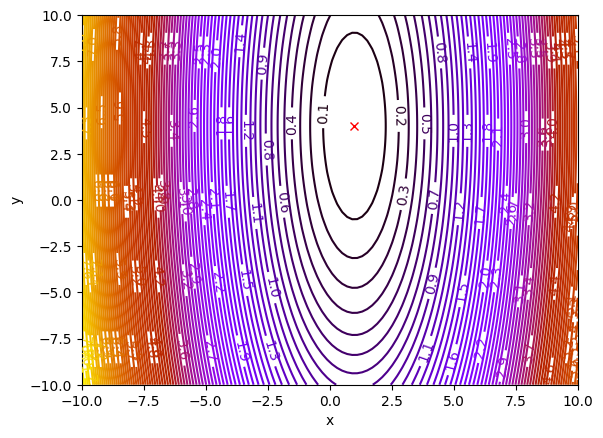

In [ ]:
#Exercise 3 part 3 - exact line search with graph n=2

import numpy as np
import math as m
import matplotlib.pyplot as plt

#this function is used to initialise x as a n x 1 vector

def x_init(n):

    x0 = np.zeros((n,1))

    for i in range(n):
      x0[i][0] = i+1

    return x0


#Lets establish our function first

def func(x,n):

    func_val = 0

    def Period_factor_func(i):
      if (i%4 == 0):
        P = 1/(4**3)

      if (i%4 == 1):
        P = 1/(4**2)

      if (i%4 == 2):
        P = 1/(4**4)

      if (i%4 == 3):
        P = 1/(4**1)

      return P

    for i in range(n):
      func_val = func_val + Period_factor_func(i+1)*(x[i][0] - (i+1)**2)**2 #this is to define the given function since it starts from x1 but we end up indexing first value as zero

    return func_val


#now to define the gradient

def grad(x,n):

    g = np.zeros((n,1))

    #now the establish the period factor for the gradient
    def Period_factor_grad(i):
      if (i%4 == 0):
        P = 2/(4**3)

      if (i%4 == 1):
        P = 2/(4**2)

      if (i%4 == 2):
        P = 2/(4**4)

      if (i%4 == 3):
        P = 2/(4**1)

      return P

    #now to establish the elements of the gradient
    for i in range(n):
      g[i][0] = Period_factor_grad(i+1)*(x[i][0] - (i+1)**2)

    return g


#now to define the hessian for this function

def hess(n): #we won't be needing x here due to the nature the function; on differentiating twice there will be no x values left

    h = np.zeros((n,n), dtype = 'float')

    #now the establish the period factor for the gradient
    def Period_factor_hess(i):
      if (i%4 == 0):
        P = 2/(4**3)

      if (i%4 == 1):
        P = 2/(4**2)

      if (i%4 == 2):
        P = 2/(4**4)

      if (i%4 == 3):
        P = 2/(4**1)

      return P

    for i in range(n):
        h[i][i] = Period_factor_hess(i+1)

    return h


#defining the norm calculation for the gradient

def norm(gradient,n): #here we are taking the gradient as an array type argument for our function

    sum = 0

    for i in range(n):
      sum = sum + (gradient[i][0])**2

    return m.sqrt(sum)


#now a function to find the desirable step length

def step_length_finder(gradient, hessian): #we take gradient and hessian as array type arguments

    S = -gradient
    H = hessian

    #we know that
    #step length = (S^T . S)/(S^T . H . S)

    step_length = (S.T @ S)/(S.T @ H @ S)

    return step_length


#now we shall define our descent algorithm

def descent(x0, n, toler):

    #starting with the given value of x initial
    x = x0

    #initialising some parameters
    g = grad(x,n)
    h = hess(n)
    L2 = norm(g,n)
    count = 0

    while(L2 > toler):

      a = step_length_finder(g,h)

      #updating values of x
      x = x - a*g

      #initialising new gradient and norm wrt to new x
      g = grad(x,n)
      L2 = norm(g,n)

      #and updating the count
      count = count + 1

      #plotting
      plt.plot(x[0][0], x[1][0], "rx-", ms=5.5)

    return count, x, func(x,n)



#now the portion to initialise everything and run the final code

toler = 0.0000000000000001 #10^-15

n=2

# Plotting the level sets using a contour map
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = 1/16 * (x[i] - 1)**2 + 1/256 * (y[j] - 4)**2

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')

x0 = x_init(n)

iter, x, f_opt = descent(x0, n, toler)

print("For the total number of variables = ", n)
print(iter)
print(x)
print(f_opt)

In [ ]:
#Exercise 3 part 3 - using Newton Method with many values of n

import numpy as np
import math as m
import time #this is to take time

#this function is used to initialise x as a n x 1 vector

def x_init(n):

    x0 = np.zeros((n,1))

    for i in range(n):
      x0[i][0] = i+1

    return x0


#Lets establish our function first

def func(x,n):

    func_val = 0

    def Period_factor_func(i):
      if (i%4 == 0):
        P = 1/(4**3)

      if (i%4 == 1):
        P = 1/(4**2)

      if (i%4 == 2):
        P = 1/(4**4)

      if (i%4 == 3):
        P = 1/(4**1)

      return P

    for i in range(n):
      func_val = func_val + Period_factor_func(i+1)*(x[i][0] - (i+1)**2)**2 #this is to define the given function since it starts from x1 but we end up indexing first value as zero

    return func_val


#now to define the gradient

def grad(x,n):

    g = np.zeros((n,1))

    #now the establish the period factor for the gradient
    def Period_factor_grad(i):
      if (i%4 == 0):
        P = 2/(4**3)

      if (i%4 == 1):
        P = 2/(4**2)

      if (i%4 == 2):
        P = 2/(4**4)

      if (i%4 == 3):
        P = 2/(4**1)

      return P

    #now to establish the elements of the gradient
    for i in range(n):
      g[i][0] = Period_factor_grad(i+1)*(x[i][0] - (i+1)**2)

    return g

#defining hessian
def hess(n): #we won't be needing x here due to the nature the function; on differentiating twice there will be no x values left

    h = np.zeros((n,n), dtype = 'float')

    #now the establish the period factor for the gradient
    def Period_factor_hess(i):
      if (i%4 == 0):
        P = 2/(4**3)

      if (i%4 == 1):
        P = 2/(4**2)

      if (i%4 == 2):
        P = 2/(4**4)

      if (i%4 == 3):
        P = 2/(4**1)

      return P

    for i in range(n):
        h[i][i] = Period_factor_hess(i+1)

    return h


#defining the norm calculation for the gradient

def norm(gradient,n): #here we are taking the gradient as an array type argument for our function

    sum = 0

    for i in range(n):
      sum = sum + (gradient[i][0])**2

    return m.sqrt(sum)



#now we shall define our gradient descent algorithm

def descent(x0, n, toler):

    #starting with the given value of x initial
    x = x0

    #initialising some parameters
    g = grad(x,n)
    h = hess(n)
    L2 = norm(g,n)

    #taking inverse of hessian
    h_inv = np.linalg.inv(h)
    count = 0
    learning_rate = 0.001 #here we give the learning rate

    while(L2 > toler):

      #updating values of x
      x = x - h_inv @ g

      #initialising new gradient and norm wrt to new x
      g = grad(x,n)
      L2 = norm(g,n)

      #and updating the count
      count = count + 1

    return count, x, func(x,n)


#now the portion to initialise everything and run the final code

toler = 0.0000000000000001 #10^-15

#we gonna loop this thing for several iterations
choices_for_n = np.array([2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000])

for i in range(len(choices_for_n)):

    #assigning a value for n
    n = choices_for_n[i]

    x0 = x_init(n)

    start = time.time()
    iter, x, f_opt = descent(x0, n, toler)
    stop = time.time()

    duration = stop - start

    print("For the total number of variables = ", n)
    print("Time taken = ", duration)
    print("iterations", iter)
    print("minimiser = ", x)
    print("f_opt = ", f_opt)
    print()
    print()

For the total number of variables =  2
Time taken =  0.004951953887939453
iterations 1
minimiser =  [[1.]
 [4.]]
f_opt =  0.0


For the total number of variables =  20
Time taken =  0.00583195686340332
iterations 1
minimiser =  [[  1.]
 [  4.]
 [  9.]
 [ 16.]
 [ 25.]
 [ 36.]
 [ 49.]
 [ 64.]
 [ 81.]
 [100.]
 [121.]
 [144.]
 [169.]
 [196.]
 [225.]
 [256.]
 [289.]
 [324.]
 [361.]
 [400.]]
f_opt =  0.0


For the total number of variables =  200
Time taken =  0.014471292495727539
iterations 1
minimiser =  [[1.0000e+00]
 [4.0000e+00]
 [9.0000e+00]
 [1.6000e+01]
 [2.5000e+01]
 [3.6000e+01]
 [4.9000e+01]
 [6.4000e+01]
 [8.1000e+01]
 [1.0000e+02]
 [1.2100e+02]
 [1.4400e+02]
 [1.6900e+02]
 [1.9600e+02]
 [2.2500e+02]
 [2.5600e+02]
 [2.8900e+02]
 [3.2400e+02]
 [3.6100e+02]
 [4.0000e+02]
 [4.4100e+02]
 [4.8400e+02]
 [5.2900e+02]
 [5.7600e+02]
 [6.2500e+02]
 [6.7600e+02]
 [7.2900e+02]
 [7.8400e+02]
 [8.4100e+02]
 [9.0000e+02]
 [9.6100e+02]
 [1.0240e+03]
 [1.0890e+03]
 [1.1560e+03]
 [1.2250e+03]
 [1.

We crashed at $a_0 =  30000$

If we were to change the starting point, it wouldn't make much of a difference since the function is convex.

The further away we get from our minimisers from where we start the function, the longer it will take to converge.

This goes for both part 2 and 3

We can conceive of a method similar to our exact line search method, such that we can find the it in one iteration

if we treat our step length value as a matrix such that its diagonals contain the minimising value for the updating condition, and if we multiply that step length with our gradient, since it is a quadratic function, for each sum in the series we would obtain its individual minimiser value

Whats happening here is

when we do

$X_k - a$ x $grad(f(X_k))$

where a is our step length

a is meant to be treated as a scalar

However, if we consider a matrix...

when we write

$f(X_k - a$ x $grad(f(X_k)))$

It looks like so

$ = 1/16 (1-a/8)^2(x_1-1)^2 + 1/256(1-a/128)^2(x_2-4)^2 + 1/4(1-a/2)^2(x_3-9)^2 + 1/64(1-a/32)^2(x_4-16)^2 + 1/16(1-a/8)^2(x_5 - 25)^2+...$

And it goes on till infinity

It is clear that the function is has some periodic factor and can be minimised if we make the values of $a$ equal to either 8, 256, 2 or 32 depending on our periodicity

**As an example, for more clarity, lets consider a three variable case**

$grad(X_k)^T = [1/8(x_1-1), 1/128(x_2-4), 1/2(x_3-9)] $

if we multiplied the first element of the gradient by 8, the second by 128 and third by 2 and subtracted this updated matrix from $X_k$ we would obtain our new values for $X_k$ which are now independent of values of $x_1, x_2, x_3$ etc.

This implies that in

$X_k - a$ x $grad(f(X_k))$

$a$ is an 3x3 matrix with only diagonal elements

$a = [[8,0,0],[0,128,0],[0,0,2]]$

So,

$[(x_1)^`,(x_2)^`,(x_2)^`]^T = [x_1, x_2, x_3]^T - [[8,0,0],[0,128,0],[0,0,2]] * [1/8(x_1-1), 1/128(x_2-4), 1/2(x_3-9)]^T$

$ = [x_1, x_2, x_3]^T - [x_1 - 1, x_2 - 4, x_3 - 9]^T$

$ = [1,4,9]$

This brings us to our optimised value at 3 iterations and can be extended to four varialbes as well, where the four variable matrix would look like this


$a = [[8,0,0,0],[0,128,0,0],[0,0,2,0],[0,0,0,32]]$

and for later iterations, the matrix a would expand with repeating values according to our period



In [4]:
#Exercise 3 part 4 - our own method

import numpy as np
import math as m
import matplotlib.pyplot as plt

#this function is used to initialise x as a n x 1 vector

def x_init(n):

    x0 = np.zeros((n,1))

    for i in range(n):
      x0[i][0] = i+1

    return x0


#Lets establish our function first

def func(x,n):

    func_val = 0

    def Period_factor_func(i):
      if (i%4 == 0):
        P = 1/(4**3)

      if (i%4 == 1):
        P = 1/(4**2)

      if (i%4 == 2):
        P = 1/(4**4)

      if (i%4 == 3):
        P = 1/(4**1)

      return P

    for i in range(n):
      func_val = func_val + Period_factor_func(i+1)*(x[i][0] - (i+1)**2)**2 #this is to define the given function since it starts from x1 but we end up indexing first value as zero

    return func_val


#now to define the gradient

def grad(x,n):

    g = np.zeros((n,1))

    #now the establish the period factor for the gradient
    def Period_factor_grad(i):
      if (i%4 == 0):
        P = 2/(4**3)

      if (i%4 == 1):
        P = 2/(4**2)

      if (i%4 == 2):
        P = 2/(4**4)

      if (i%4 == 3):
        P = 2/(4**1)

      return P

    #now to establish the elements of the gradient
    for i in range(n):
      g[i][0] = Period_factor_grad(i+1)*(x[i][0] - (i+1)**2)

    return g


#now to define a nxn matrix which minimises

def matrix(n):

    h = np.zeros((n,n), dtype = 'float')

    def Period_factor_matrix(i):
      if (i%4 == 0):
        P = 32

      if (i%4 == 1):
        P = 8

      if (i%4 == 2):
        P = 128

      if (i%4 == 3):
        P = 2

      return P

    for i in range(n):
        h[i][i] = Period_factor_matrix(i+1)

    return h


#defining the norm calculation for the gradient

def norm(gradient,n): #here we are taking the gradient as an array type argument for our function

    sum = 0

    for i in range(n):
      sum = sum + (gradient[i][0])**2

    return m.sqrt(sum)


#now we shall define our descent algorithm

def descent(x0, n, toler):

    #starting with the given value of x initial
    x = x0

    #initialising some parameters
    g = grad(x,n)
    m = matrix(n)
    L2 = norm(g,n)
    count = 0

    while(L2 > toler):

      #updating values of x
      x = x - m @ g

      #initialising new gradient and norm wrt to new x
      g = grad(x,n)
      L2 = norm(g,n)

      #and updating the count
      count = count + 1

    return count, x, func(x,n)



#now the portion to initialise everything and run the final code

toler = 0.0000000000000001 #10^-15

n=30000

x0 = x_init(n)

iter, x, f_opt = descent(x0, n, toler)

print("For the total number of variables = ", n)
print("iterations = ", iter)
print(x)
print(f_opt)

For the total number of variables =  30000
iterations =  1
[[1.00000000e+00]
 [4.00000000e+00]
 [9.00000000e+00]
 ...
 [8.99880004e+08]
 [8.99940001e+08]
 [9.00000000e+08]]
0.0
